In [2]:
import datetime
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
aapl = pdr.get_data_yahoo(
    'AAPL',
    start=datetime.datetime(2006, 10, 1),
    end=datetime.datetime(2012, 1, 1)
)

In [4]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,29.237566,28.507684,28.901012,28.889151,1.882896e+08,24.964252
std,14.199012,14.029758,14.123131,14.119734,1.027007e+08,12.201417
min,10.568571,10.371428,10.488571,10.461429,3.937360e+07,9.040131
25%,17.752857,17.182143,17.457857,17.431429,1.122037e+08,15.063183
50%,25.642857,24.725714,25.260000,25.120001,1.629866e+08,21.707180
75%,39.132858,38.351429,38.777143,38.699999,2.316230e+08,33.442190
max,60.957142,59.427143,60.251427,60.320000,8.432424e+08,52.124886


Opening - opening prices per day
Closing - closing prices per day
Volume - registers the number of shares that got traded during a single day
Adj Close - adjusted closing price, that was slightly adapted to include any actions that occurred at any time, before
the next day is open.

Save csv locally

In [5]:
aapl.to_csv('data/aapl_ohlc.csv')

then you can read it as usual using pandas DataFrame

    df = pd.DataFrame(data='data/aapl_ohlc.csv', index_col='Date', parse_dates=True)

Inspect the index and columns

In [6]:
print('\nIndex column Date:\n', aapl.index)
print('\nColumns\n:', aapl.columns)
print('\nLast ten rows of Close column:\n', aapl['Close'][-10:])


Index column Date:
 DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)

Columns
: Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

Last ten rows of Close column:
 Date
2011-12-16    54.431427
2011-12-19    54.601429
2011-12-20    56.564285
2011-12-21    56.635715
2011-12-22    56.935715
2011-12-23    57.618572
2011-12-27    58.075714
2011-12-28    57.520000
2011-12-29    57.874287
2011-12-30    57.857143
Name: Close, dtype: float64


Inspect the first rows of November-December 2006

Remember that loc specified by keys takes the values INCLUSIVELY,
while iloc using indexes EXCLUSIVELY

    loc[index_start:index_end, col_start:col_end]

In [7]:
# show the High - Close (inclusively) columns from Nov - end of Dec 2006
print(
    aapl.loc[pd.Timestamp('2006-11-01') : pd.Timestamp('2006-12-31'), 'High' : 'Close'].head()
)

                 High        Low       Open      Close
Date                                                  
2006-11-01  11.625714  11.194285  11.585714  11.308572
2006-11-02  11.331429  11.214286  11.274285  11.282857
2006-11-03  11.361428  11.112857  11.337143  11.184286
2006-11-06  11.437143  11.204286  11.278571  11.387143
2006-11-07  11.571428  11.447143  11.492857  11.501429


In [8]:
# show the first 5 data samples from 2007
print(
    aapl.loc['2007'].head()
)
# show data for 2007 January
print(aapl.loc['2007-01'])
# elements 20-25 from index column and 0-2 columns (exclusively)
print(aapl.iloc[20:25, :2])

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2007-01-03  12.368571  11.700000  12.327143  11.971429  309579900  10.344985
2007-01-04  12.278571  11.974286  12.007143  12.237143  211815100  10.574598
2007-01-05  12.314285  12.057143  12.252857  12.150000  208685400  10.499294
2007-01-08  12.361428  12.182858  12.280000  12.210000  199276700  10.551140
2007-01-09  13.282857  12.164286  12.350000  13.224286  837324600  11.427628
                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2007-01-03  12.368571  11.700000  12.327143  11.971429  309579900  10.344985
2007-01-04  12.278571  11.974286  12.007143  12.237143  211815100  10.574598
2007-01-05  12.314285  12.057143  12.252857  12.150000  208685400  10.499294
2007-01-08  12.361428  12.182858  12.280000  12.210000  199276700  10.551140

Sample of randomly gathered data

In [9]:
sample = aapl.sample(20)
print(sample)

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2008-01-04  27.571428  25.555714  27.350000  25.721428  363958000  22.226898
2010-06-02  37.828571  37.189999  37.791428  37.707142  172137000  32.584229
2008-06-19  26.048571  25.257143  25.507143  25.842857  197987300  22.331831
2006-12-04  13.150000  12.928572  13.125714  13.017143  177384200  11.248627
2007-04-25  13.628572  13.400000  13.461429  13.621428  296786000  11.770813
2007-10-24  26.744286  25.605715  26.544285  26.561428  322120400  22.952776
2010-01-14  30.065714  29.860001  30.015715  29.918571  108223500  25.853821
2009-06-05  20.914286  20.458570  20.758572  20.667143  158179000  17.859293
2007-08-29  19.168571  18.505714  18.554285  19.154285  291715200  16.551973
2007-03-12  12.855714  12.570000  12.581429  12.838572  182352100  11.094318
2010-10-20  44.892857  43.838570  44.142857  44.361427  180406100  38.334461

Resample to monthly level - it will filter the data considering the mean (average prices) from each month.

In [10]:
monthly_aapl = aapl.resample('q').mean()
print('\nAverage for each quater:\n', monthly_aapl)

print('\nAverage for the last day of each quater:\n',
    aapl.asfreq(freq='q', method='bfill').mean()
)


Average for each quater:
                  High        Low       Open      Close        Volume  \
Date                                                                   
2006-12-31  11.972381  11.688390  11.837687  11.833197  1.790224e+08   
2007-03-31  12.794754  12.497494  12.646089  12.645738  2.329950e+08   
2007-06-30  15.644853  15.278526  15.477823  15.472608  2.146998e+08   
2007-09-30  19.671905  19.025669  19.386644  19.374240  2.750420e+08   
2007-12-31  25.914375  25.017255  25.559263  25.512411  2.606651e+08   
2008-03-31  20.366956  19.445902  19.964637  19.876956  3.400292e+08   
2008-06-30  25.151674  24.357723  24.783549  24.795246  2.376992e+08   
2008-09-30  23.367701  22.416183  22.946741  22.877321  2.222776e+08   
2008-12-31  14.017031  13.109129  13.610067  13.562321  3.330470e+08   
2009-03-31  13.619415  13.107986  13.315714  13.367728  1.942532e+08   
2009-06-30  18.697868  18.201587  18.423968  18.487619  1.347397e+08   
2009-09-30  23.654911  23.216071  23.

The asfreq() returns a Series object with the last day of each quater in it.

    · mean() using asfreq(freq='q') returns the mean of each of the last day in the quater.

Resample returns a DatetimeIndexResampler and you cannot see what's actually inside. Think of it as the groupby method.
It creates a list of bins (groups).

    · mean() using resample(freq='q') return the mean of each quater.

Think of resample as groupby + every method that you can call after groupby (e.g. mean, sum, apply, you name it) .

Think of asfreq as a filter mechanism with limited fillna() capabilities (in fillna(), you can specify limit, but
asfreq() does not support it).

Create a new column with difference between Open and Close columns

In [11]:
aapl['Diff'] = aapl['Open'] - aapl['Close']
print(aapl['Diff'])

Date
2006-10-02    0.034286
2006-10-03    0.052857
2006-10-04   -0.182858
2006-10-05   -0.042857
2006-10-06    0.028571
                ...   
2011-12-23   -0.520000
2011-12-27   -0.490002
2011-12-28    0.607143
2011-12-29   -0.245716
2011-12-30   -0.212856
Name: Diff, Length: 1323, dtype: float64


Adding grid argument indicates, that the plot will have a grind in the background.

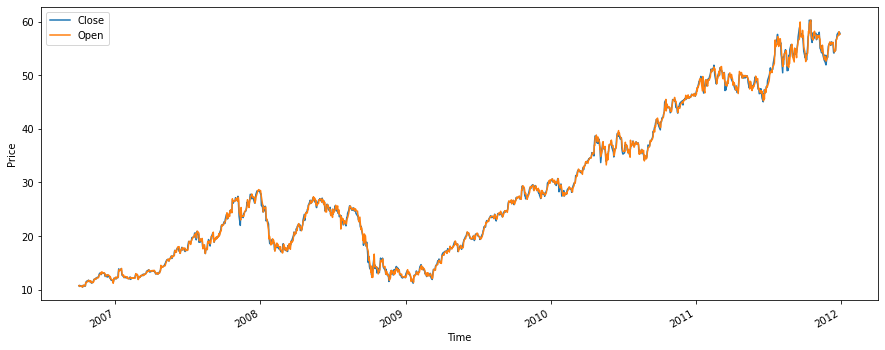

In [12]:
plt.figure(figsize=(15, 6))
plt.grid = True
aapl['Close'].plot(label='Close')
aapl['Open'].plot(label='Open')
plt.xlabel('Time'), plt.ylabel('Price')
plt.legend()
plt.show()

# Common Financial Analysis
    · returns,
    · moving windows,
    · volatility calculation
    · and Ordinary Least-Squares Regression (OLS)

# Returns
The simple daily percentage change doesn’t take into account dividends and other factors and represents the amount of
percentage change in the value of a stock over a single day of trading.

In [13]:
daily_close = aapl['Adj Close']

# Daily Returns (daily percentage change):

In [14]:
daily_pct_change = daily_close.pct_change()
print('\nDaily Returns (daily percentage change):\n', daily_pct_change)


Daily Returns (daily percentage change):
 Date
2006-10-02         NaN
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007297
2006-10-06   -0.008152
                ...   
2011-12-23    0.011993
2011-12-27    0.007934
2011-12-28   -0.009569
2011-12-29    0.006160
2011-12-30   -0.000296
Name: Adj Close, Length: 1323, dtype: float64


Replace NaN (Not a Number) values with 0

In [15]:
daily_pct_change.fillna(0, inplace=True)
print('\nDaily Returns (daily percentage change):\n', daily_pct_change)


Daily Returns (daily percentage change):
 Date
2006-10-02    0.000000
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007297
2006-10-06   -0.008152
                ...   
2011-12-23    0.011993
2011-12-27    0.007934
2011-12-28   -0.009569
2011-12-29    0.006160
2011-12-30   -0.000296
Name: Adj Close, Length: 1323, dtype: float64


# Daily Log Returns

Note that you calculate the log returns to get a better insight into the growth of your returns over time.

In [16]:
daily_log_returns = np.log(daily_pct_change + 1)
print('\nDaily Log Returns:\n', daily_log_returns)


Daily Log Returns:
 Date
2006-10-02    0.000000
2006-10-03   -0.010474
2006-10-04    0.017397
2006-10-05   -0.007323
2006-10-06   -0.008185
                ...   
2011-12-23    0.011922
2011-12-27    0.007903
2011-12-28   -0.009615
2011-12-29    0.006141
2011-12-30   -0.000296
Name: Adj Close, Length: 1323, dtype: float64


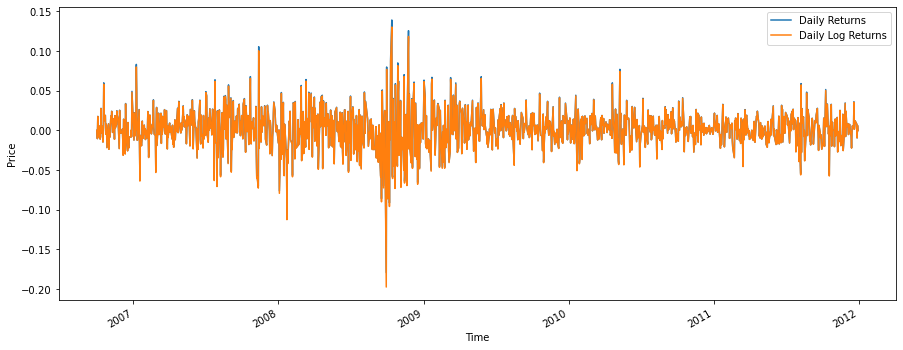

In [17]:
plt.figure(figsize=(15, 6))
plt.grid=True
daily_pct_change.plot(label='Daily Returns')
daily_log_returns.plot(label='Daily Log Returns')
plt.xlabel('Time'), plt.ylabel('Price')
plt.legend()
plt.show()

Knowing how to calculate the daily percentage change is nice, but what when you want to know the monthly or quarterly
returns? In such cases, you can fall back on the resample().

Resample to Business Months, take only last observation as value.

Monthly or quaterly returs can be obtained using:

    · aapl.asfreq('BM'))
    · aapl.resample('BM').apply(lambda x: x[-1])

In [18]:
monthly_aapl = aapl.resample('BM').apply(lambda i: i[-1])
print(monthly_aapl)

monthly_aapl = aapl.asfreq('BM')
print(monthly_aapl)

                 High        Low       Open      Close     Volume  Adj Close  \
Date                                                                           
2006-10-31  11.668571  11.461429  11.635715  11.582857  125368600  10.009202   
2006-11-30  13.240000  13.008572  13.172857  13.094286  217621600  11.315289   
2006-12-29  12.200000  11.908571  11.992857  12.120000  269107300  10.473372   
2007-01-31  12.285714  12.050000  12.122857  12.247143  214017300  10.583235   
2007-02-28  12.228572  11.857142  11.857142  12.087143  229868800  10.444975   
...               ...        ...        ...        ...        ...        ...   
2011-08-31  56.011429  54.551430  55.795715  54.975716  130646600  47.506680   
2011-09-30  55.555714  54.454285  55.302856  54.474285  136910200  47.073372   
2011-10-31  58.475716  57.292858  57.488571  57.825714   96375300  49.969471   
2011-11-30  54.611427  54.042858  54.470001  54.599998  101484600  47.181999   
2011-12-30  58.040001  57.641430  57.644

Using pct_change() is quite the convenience, but it also obscures how exactly the daily percentages are calculated.
That’s why you can alternatively make use of Pandas’ shift() function instead of using pct_change(). You then divide the
daily_close values by the daily_close.shift(1) -1. By using this function, however, you will be left with NA values at
the beginning of the resulting DataFrame.

In [19]:
print(
    aapl['Close'] / aapl['Close'].shift(1) - 1
)

print(
    aapl['Close'].pct_change()
)

Date
2006-10-02         NaN
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007296
2006-10-06   -0.008152
                ...   
2011-12-23    0.011993
2011-12-27    0.007934
2011-12-28   -0.009569
2011-12-29    0.006159
2011-12-30   -0.000296
Name: Close, Length: 1323, dtype: float64
Date
2006-10-02         NaN
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007296
2006-10-06   -0.008152
                ...   
2011-12-23    0.011993
2011-12-27    0.007934
2011-12-28   -0.009569
2011-12-29    0.006159
2011-12-30   -0.000296
Name: Close, Length: 1323, dtype: float64


In [20]:
print(
    np.log(aapl['Close'] / aapl['Close'].shift(1))
)

print(
    np.log(aapl['Close'].pct_change() + 1)
)

Date
2006-10-02         NaN
2006-10-03   -0.010474
2006-10-04    0.017396
2006-10-05   -0.007323
2006-10-06   -0.008185
                ...   
2011-12-23    0.011922
2011-12-27    0.007903
2011-12-28   -0.009615
2011-12-29    0.006140
2011-12-30   -0.000296
Name: Close, Length: 1323, dtype: float64
Date
2006-10-02         NaN
2006-10-03   -0.010474
2006-10-04    0.017396
2006-10-05   -0.007323
2006-10-06   -0.008185
                ...   
2011-12-23    0.011922
2011-12-27    0.007903
2011-12-28   -0.009615
2011-12-29    0.006140
2011-12-30   -0.000296
Name: Close, Length: 1323, dtype: float64


For your reference, the calculation of the daily percentage change is based on the following formula:

        · returns (daily percentage change) = (price(time)/price(time−1)) − 1,
            where pct_change.shift(1) = price(time - 1)
        · then the daily log returns = np.log(returns + 1)
            where p is the price, t is the time (a day in this case) and r is the return.

Additionally, you can plot the distribution of daily_pct_change

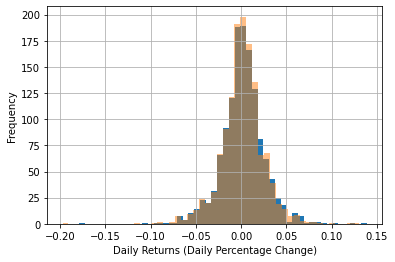

In [21]:
daily_pct_change = aapl['Close'].pct_change()
daily_log_returns = np.log(daily_pct_change + 1)
growth = daily_log_returns - daily_pct_change
daily_pct_change.hist(
    bins=50
)
daily_log_returns.hist(
    bins=50,
    alpha = 0.5
)
plt.xlabel('Daily Returns (Daily Percentage Change)')
plt.ylabel('Frequency')
plt.show()

The distribution looks very symmetrical and normally distributed: the daily changes center around the bin 0.00. Note,
though, how you can and should use the results of the describe() function, applied on daily_pct_c, to correctly
interpret the results of the histogram. You will see that the mean is very close to the 0.00 bin also and that the
standard deviation is 0.02. Also, take a look at the percentiles to know how many of your data points fall below
-0.010672, 0.001677 and 0.014306.

In [22]:
daily_pct_change.describe()

count    1322.000000
mean        0.001566
std         0.023992
min        -0.179195
25%        -0.010672
50%         0.001677
75%         0.014306
max         0.139050
Name: Close, dtype: float64

# Cumulative Daily Rate Of Return

The cumulative daily rate of return is useful to determine the value of an investment at regular intervals. You can
calculate the cumulative daily rate of return by using the daily percentage change values, adding 1 to them and
calculating the cumulative product with the resulting values:

In [23]:
daily_pct_change = aapl['Close'].pct_change()
cum_daily_return = (daily_pct_change + 1).cumprod()
print(cum_daily_return)

Date
2006-10-02         NaN
2006-10-03    0.989581
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
                ...   
2011-12-23    5.387791
2011-12-27    5.430537
2011-12-28    5.378574
2011-12-29    5.411702
2011-12-30    5.410099
Name: Close, Length: 1323, dtype: float64


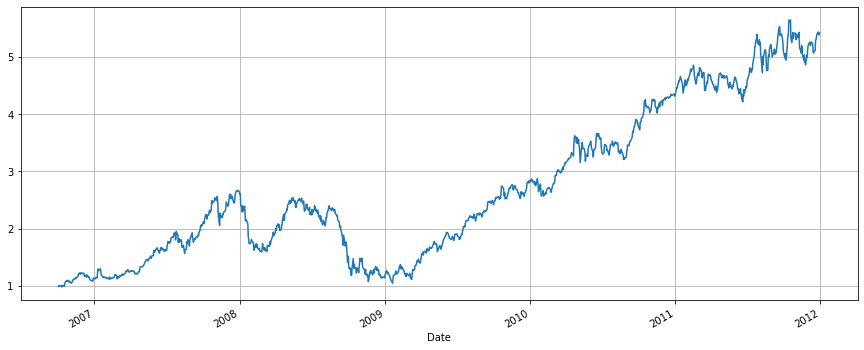

In [24]:
cum_daily_return.plot(
    figsize=(15, 6),
    grid=True
)
plt.show()

Remember, in order to get the returns from specific time interval, use resample, the asfreq will return the returns
from the last day in these intervals.

In [25]:
monthly_open = aapl['Open'].resample('W').mean()
monthly_pct_change_open = monthly_open.pct_change()
monthly_pct_change_open.fillna(0, inplace=True)
monthly_cum_return_open = (monthly_pct_change_open + 1).cumprod()

monthly_close = aapl['Close'].resample('W').mean()
monthly_pct_change_close = monthly_close.pct_change()
monthly_pct_change_close.fillna(0, inplace=True)
monthly_cum_return_close = (monthly_pct_change_close + 1).cumprod()


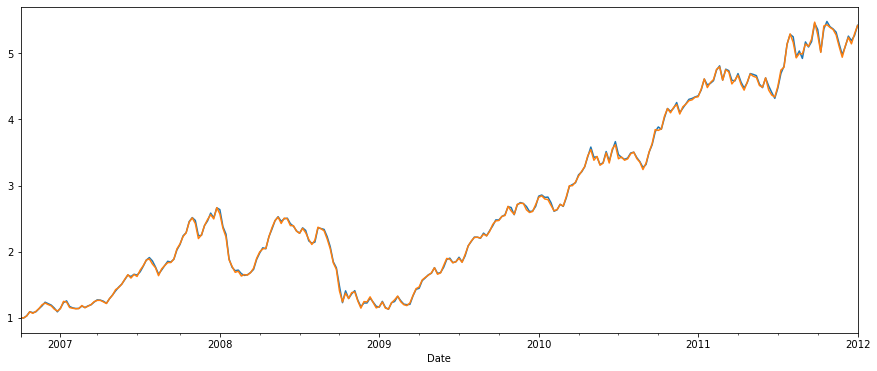

In [26]:
plt.figure(figsize=(15, 6))
monthly_cum_return_open.plot()
monthly_cum_return_close.plot()
plt.show()

Knowing how to calculate the returns is a valuable skill, but you’ll often see that these numbers don’t really say much
when you don’t compare them to other stock. That’s why you’ll often see examples where two or more stocks are compared.
In the rest of this section, you’ll focus on getting more data from Yahoo! Finance so that you can calculate the daily
percentage change and compare the results.

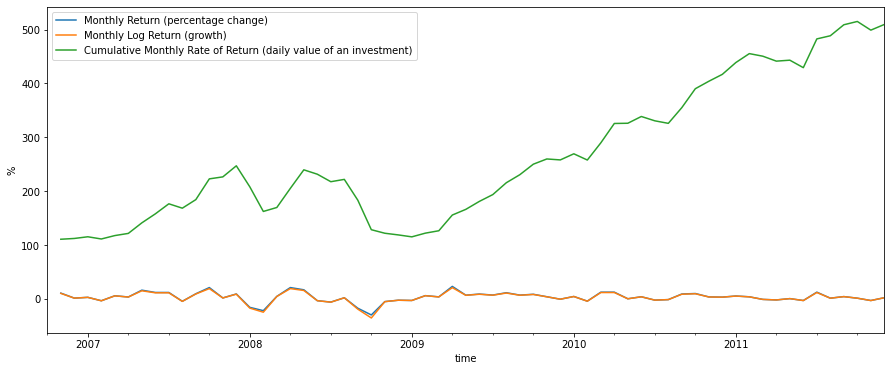

In [27]:
plt.figure(figsize=(15, 6))
(aapl['Close'].resample('M').mean().pct_change() * 100).plot(label='Monthly Return (percentage change)')
(
    np.log(aapl['Close'].resample('M').mean().pct_change() + 1) * 100
).plot(label='Monthly Log Return (growth)')
(
    (aapl['Close'].resample('M').mean().pct_change() + 1).cumprod() * 100
).plot(label='Cumulative Monthly Rate of Return (daily value of an investment)')
plt.xlabel('time'), plt.ylabel('%')
plt.legend()
plt.show()

Let’s start! Get more data from Yahoo! Finance first. You can easily do this by making a function that takes in the
ticker or symbol of the stock, a start date and an end date. The next function that you see, data(), then takes the
ticker to get your data from the startdate to the enddate and returns it so that the get() function can continue. You
map the data with the right tickers and return a DataFrame that concatenates the mapped data with tickers.

Check out the code below, where the stock data from Apple, Microsoft, IBM, and Google are loaded and gathered into one
big DataFrame:

In [28]:
def get(symbols, start_date, end_date):
    def dataFrames(symbols):
        return pdr.get_data_yahoo(symbols, start=start_date, end=end_date)
    df_set = map(dataFrames, symbols)
    return pd.concat(df_set, keys=symbols, names=['Ticker', 'Date'])

In [29]:
tickers = [
    'AAPL', 'MSFT', 'IBM', 'GOOG'
]

In [30]:
big_df = get(
    symbols=tickers,
    start_date=datetime.datetime(2006, 10, 1),
    end_date=datetime.datetime(2012, 1, 1)
)

In [31]:
print(big_df)

                         High         Low        Open       Close  \
Ticker Date                                                         
AAPL   2006-10-02   10.838572   10.614285   10.728572   10.694285   
       2006-10-03   10.707143   10.455714   10.635715   10.582857   
       2006-10-04   10.780000   10.451428   10.585714   10.768572   
       2006-10-05   10.880000   10.590000   10.647142   10.690000   
       2006-10-06   10.720000   10.544286   10.631429   10.602858   
...                       ...         ...         ...         ...   
GOOG   2011-12-23  316.154968  314.102661  314.819977  315.387848   
       2011-12-27  321.041656  314.819977  314.844879  318.929565   
       2011-12-28  321.295715  317.858582  320.174896  318.655609   
       2011-12-29  320.299438  316.414001  319.547272  320.000549   
       2011-12-30  322.172424  319.811279  319.811279  321.744019   

                        Volume   Adj Close  
Ticker Date                                 
AAPL   2006-

You can then use the big DataFrame to start making some interesting plots:

In [32]:
daily_close_px = big_df['Adj Close'].reset_index().pivot(index='Date', columns='Ticker', values='Adj Close')
print(daily_close_px)

Ticker           AAPL        GOOG         IBM       MSFT
Date                                                    
2006-10-02   9.241351  199.970459   54.738338  20.153618
2006-10-03   9.145061  201.265610   54.591251  20.160980
2006-10-04   9.305547  207.073837   55.560726  20.580849
2006-10-05   9.237648  205.136093   55.440342  20.566118
2006-10-06   9.162347  209.464874   55.587467  20.529287
...               ...         ...         ...        ...
2011-12-23  49.790466  315.387848  135.163544  21.301115
2011-12-27  50.185513  318.929565  135.309937  21.309301
2011-12-28  49.705292  318.655609  134.607559  21.129261
2011-12-29  50.011452  320.000549  136.209763  21.292927
2011-12-30  49.996635  321.744019  134.527130  21.243826

[1323 rows x 4 columns]


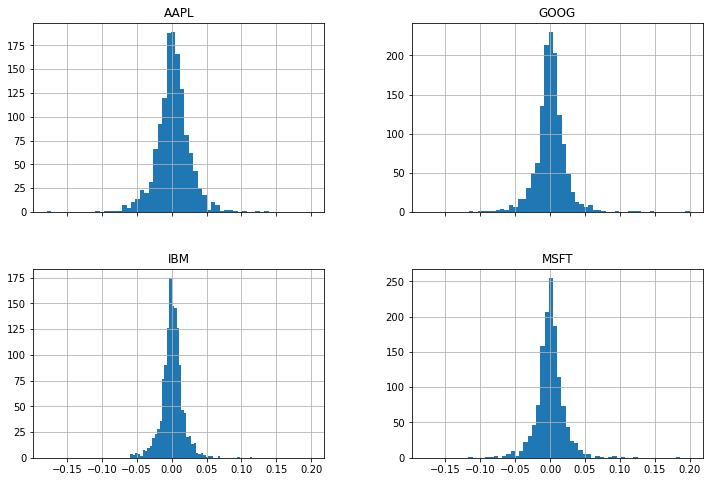

In [33]:
daily_close_px_pct_change = daily_close_px.pct_change()
daily_close_px_pct_change.hist(
    bins=50,
    sharex=True,
    figsize=(12, 8)
)
plt.show()

Another useful plot is the scatter matrix. You can easily do this by using the pandas library. Don’t forget to add the
scatter_matrix() function to your code so that you actually make a scatter matrix :) As arguments, you pass the
daily_pct_change and as a diagonal, you set that you want to have a Kernel Density Estimate (KDE) plot. Additionally,
you can set the transparency with the alpha argument and the figure size with figsize.

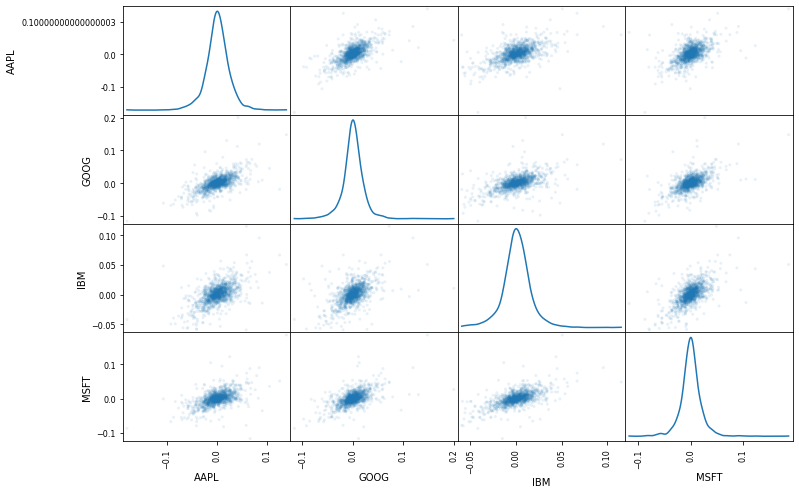

In [34]:
pd.plotting.scatter_matrix(
    daily_close_px_pct_change,
    diagonal='kde',
    alpha=0.1,
    figsize=(12, 8)
)
plt.show()

Kernel Density Estimate plot estimates the probability density function of a random variable.

# Moving Windows
Moving windows are there when you compute the statistic on a window of data represented by a particular period of time
and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as
long as the window falls first within the dates of the time series.

The exact meaning, of course, depends on the statistic that you’re applying to the data.

    For example,

    · Rolling Mean smoothes out short-term fluctuations and highlight longer-term trends in data.

In [35]:
moving_avg = aapl['Adj Close'].rolling(window=60).mean()
moving_var = aapl['Adj Close'].rolling(window=60).var()
moving_median = aapl['Adj Close'].rolling(window=60).median()
moving_min = aapl['Adj Close'].rolling(window=60).min()
moving_max = aapl['Adj Close'].rolling(window=60).max()
moving_std = aapl['Adj Close'].rolling(window=60).std()

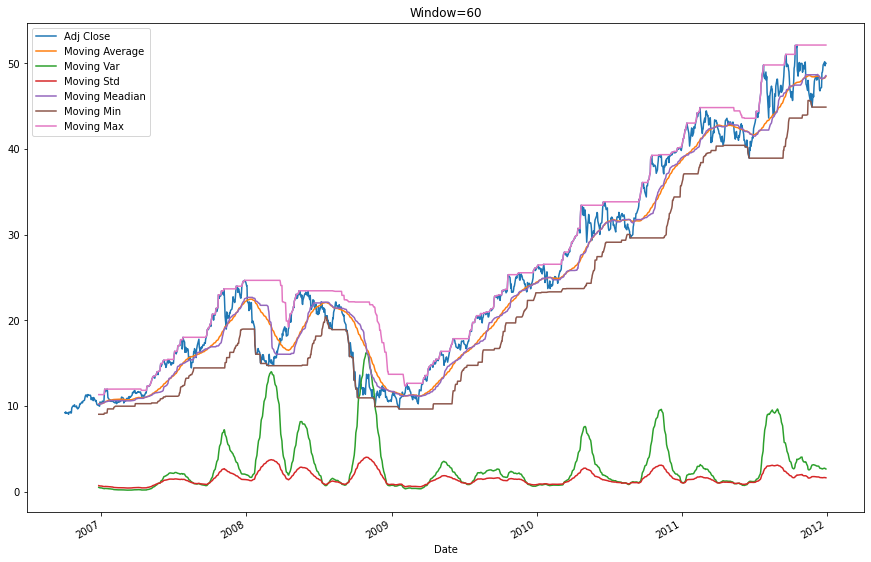

In [36]:
plt.figure(figsize=(15, 10))
aapl['Adj Close'].plot(label='Adj Close')
moving_avg.plot(label='Moving Average')
moving_var.plot(label='Moving Var')
moving_std.plot(label='Moving Std')
moving_median.plot(label='Moving Meadian')
moving_min.plot(label='Moving Min')
moving_max.plot(label='Moving Max')
plt.title('Window=60')
plt.legend()
plt.show()

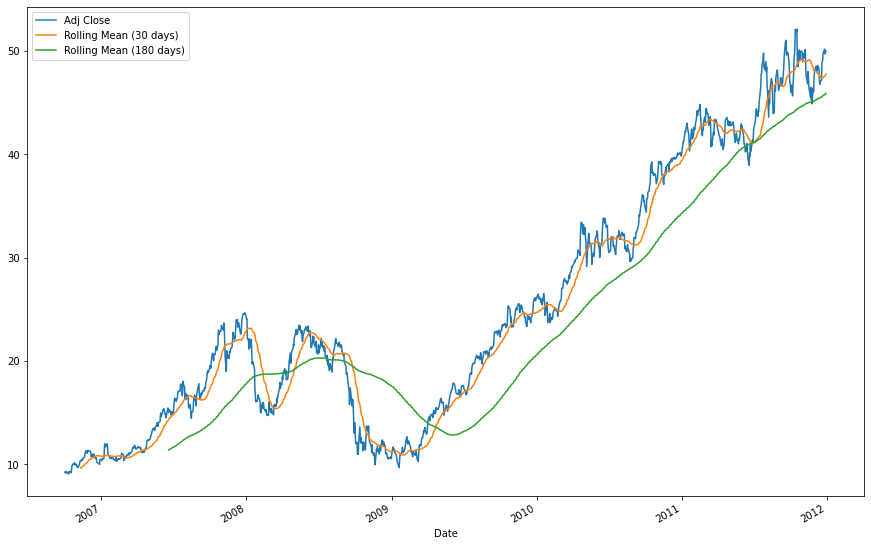

In [37]:
plt.figure(figsize=(15, 10))
aapl['Adj Close'].plot(label='Adj Close')
aapl['Adj Close'].rolling(window=30).mean().plot(label='Rolling Mean (30 days)')
aapl['Adj Close'].rolling(window=180).mean().plot(label='Rolling Mean (180 days)')
plt.legend()
plt.show()

# Volatility Calculation
The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period
of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less
risk or to a market index to examine the stock’s volatility in the overall market.

Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over
another.

The moving historical standard deviation of the log returns — i.e. the moving historical volatility — might be more of
interest:

    Also make use of pd.rolling_std(data, window=x) * math.sqrt(window)

for the moving historical standard deviation of the log returns (aka the moving historical volatility).

In [38]:
volatility_aapl = big_df.loc['AAPL', 'Adj Close'].pct_change().rolling(window=75).std() * np.sqrt(75)
volatility_goog = big_df.loc['GOOG', 'Adj Close'].pct_change().rolling(window=75).std() * np.sqrt(75)
volatility_ibm = big_df.loc['IBM', 'Adj Close'].pct_change().rolling(window=75).std() * np.sqrt(75)
volatility_msft = big_df.loc['MSFT', 'Adj Close'].pct_change().rolling(window=75).std() * np.sqrt(75)

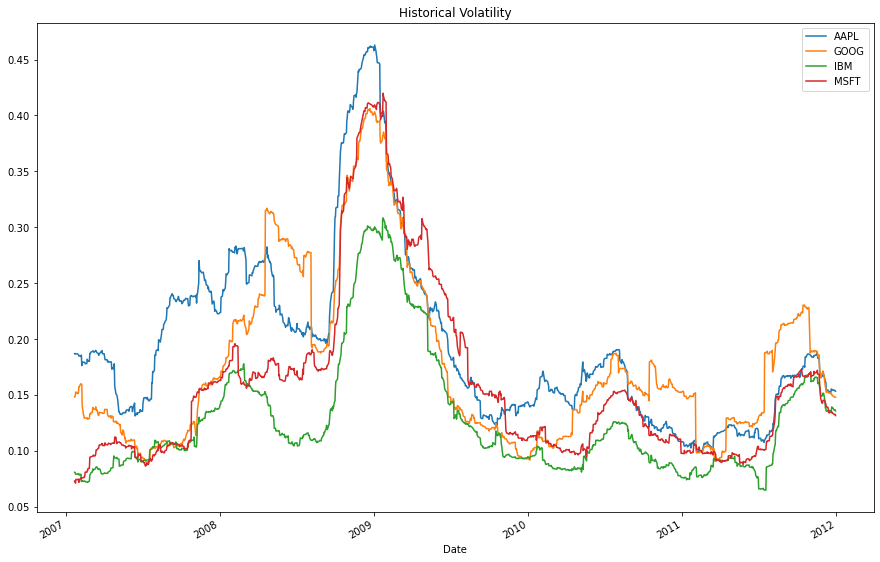

In [39]:
plt.figure(figsize=(15, 10))
volatility_aapl.plot(label='AAPL')
volatility_goog.plot(label='GOOG')
volatility_ibm.plot(label='IBM')
volatility_msft.plot(label='MSFT')
plt.title('Historical Volatility')
plt.legend()
plt.show()

In [40]:
volatility_aapl = big_df.loc['AAPL', 'Adj Close'].pct_change().rolling(window=75).std()
volatility_goog = big_df.loc['GOOG', 'Adj Close'].pct_change().rolling(window=75).std()
volatility_ibm = big_df.loc['IBM', 'Adj Close'].pct_change().rolling(window=75).std()
volatility_msft = big_df.loc['MSFT', 'Adj Close'].pct_change().rolling(window=75).std()

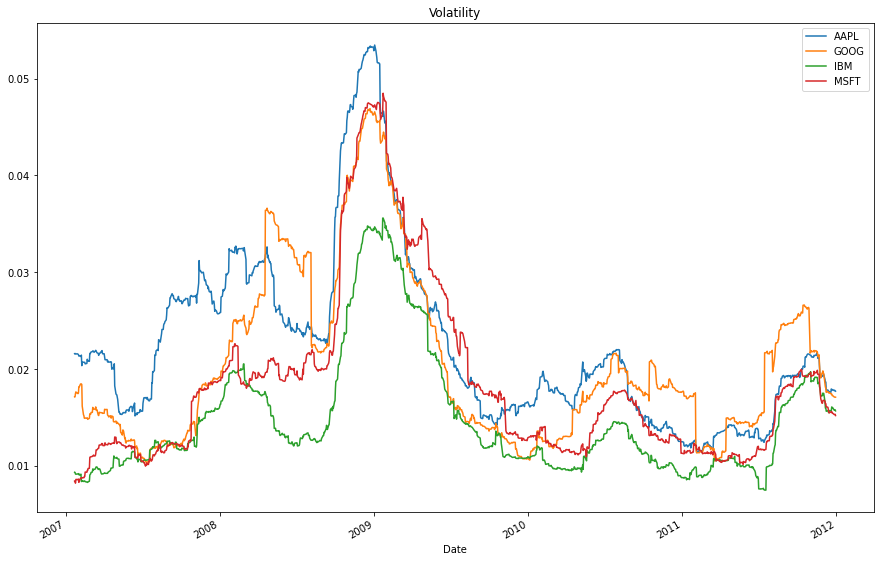

In [41]:
plt.figure(figsize=(15, 10))
volatility_aapl.plot(label='AAPL')
volatility_goog.plot(label='GOOG')
volatility_ibm.plot(label='IBM')
volatility_msft.plot(label='MSFT')
plt.title('Volatility')
plt.legend()
plt.show()

Considering all of this, you see that it’s definitely a skill to get the right window size based upon the data sampling
frequency.

# Ordinary Least-Squares Regression (OLS)
After all of the calculations, you might also perform a maybe more statistical analysis of your financial data, with a
more traditional regression analysis, such as the Ordinary Least-Squares Regression (OLS).

To do this, you have to make use of the statsmodels library, which not only provides you with the classes and functions
to estimate many different statistical models but also allows you to conduct statistical tests and perform statistical
data exploration.

In [42]:
import statsmodels.api as sm
from pandas.core.tools import datetimes as datetools

Calculate the Daily Log Returns for all tickers

In [43]:
all_daily_log_returns = np.log(big_df['Adj Close'].pct_change() + 1)

Isolate the AAPL Daily Log Returns

In [44]:
aapl_daily_log_returns = all_daily_log_returns.loc['AAPL', :]
print(aapl_daily_log_returns)

aapl_daily_log_returns.index = aapl_daily_log_returns.index.droplevel('Ticker')
print(aapl_daily_log_returns)

Ticker  Date      
AAPL    2006-10-02         NaN
        2006-10-03   -0.010474
        2006-10-04    0.017397
        2006-10-05   -0.007323
        2006-10-06   -0.008185
                        ...   
        2011-12-23    0.011922
        2011-12-27    0.007903
        2011-12-28   -0.009615
        2011-12-29    0.006141
        2011-12-30   -0.000296
Name: Adj Close, Length: 1323, dtype: float64
Date
2006-10-02         NaN
2006-10-03   -0.010474
2006-10-04    0.017397
2006-10-05   -0.007323
2006-10-06   -0.008185
                ...   
2011-12-23    0.011922
2011-12-27    0.007903
2011-12-28   -0.009615
2011-12-29    0.006141
2011-12-30   -0.000296
Name: Adj Close, Length: 1323, dtype: float64


Isolate the MSFT Daily Log Returns

In [45]:
msft_daily_log_returns = all_daily_log_returns.loc['MSFT', :]
print(msft_daily_log_returns)
msft_daily_log_returns.index = msft_daily_log_returns.index.droplevel('Ticker')
print(msft_daily_log_returns)

Ticker  Date      
MSFT    2006-10-02   -0.908572
        2006-10-03    0.000365
        2006-10-04    0.020612
        2006-10-05   -0.000716
        2006-10-06   -0.001792
                        ...   
        2011-12-23    0.008488
        2011-12-27    0.000384
        2011-12-28   -0.008485
        2011-12-29    0.007716
        2011-12-30   -0.002309
Name: Adj Close, Length: 1323, dtype: float64
Date
2006-10-02   -0.908572
2006-10-03    0.000365
2006-10-04    0.020612
2006-10-05   -0.000716
2006-10-06   -0.001792
                ...   
2011-12-23    0.008488
2011-12-27    0.000384
2011-12-28   -0.008485
2011-12-29    0.007716
2011-12-30   -0.002309
Name: Adj Close, Length: 1323, dtype: float64


Build a new DataFrame containing the AAPL and MSFT Daily Log Returns

In [55]:
aapl_msft_df = pd.concat(
    [aapl_daily_log_returns, msft_daily_log_returns],
    keys=['AAPL', 'MSFT'],
    axis=1
)[1:]
# aapl_msft_df.fillna(0, inplace=True)
print(aapl_msft_df)

                AAPL      MSFT
Date                          
2006-10-03 -0.010474  0.000365
2006-10-04  0.017397  0.020612
2006-10-05 -0.007323 -0.000716
2006-10-06 -0.008185 -0.001792
2006-10-09  0.005509 -0.005397
...              ...       ...
2011-12-23  0.011922  0.008488
2011-12-27  0.007903  0.000384
2011-12-28 -0.009615 -0.008485
2011-12-29  0.006141  0.007716
2011-12-30 -0.000296 -0.002309

[1322 rows x 2 columns]


Add a constant

In [56]:
CONST_DATA = sm.add_constant(aapl_msft_df['AAPL'])

Construct the model sm.OLS (Ordinary Least-Squares Regression)

In [57]:
model = sm.OLS(aapl_msft_df['MSFT'], CONST_DATA).fit()

In [58]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           1.33e-96
Time:                        10:14:35   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

Things to look out for when you’re studying the result of the model summary are the following:

    · The Dep. Variable, which indicates which variable is the response in the model
    · The Model, in this case, is OLS. It’s the model you’re using in the fit
    · Additionally, you also have the Method to indicate how the parameters of the model were calculated. In this case,
    you see that this is set at Least Squares
    · The number of observations (No. Observations). Note that you could also derive this with the Pandas package by
    using the info() function.
    · The degree of freedom of the residuals (DF Residuals)
    · The number of parameters in the model, indicated by DF Model; Note that the number doesn’t include the constant
    term X which was defined in the code above.
    · R-squared, which is the coefficient of determination. This score indicates how well the regression line
    approximates the real data points. In this case, the result is 0.280. In percentages, this means that the score is
    at 28%. When the score is 0%, it indicates that the model explains none of the variability of the response data
    around its mean. Of course, a score of 100% indicates the opposite.
    · You also see the Adj. R-squared score, which at first sight gives the same number. However, the calculation behind
    this metric adjusts the R-Squared value based on the number of observations and the degrees-of-freedom of the
    residuals (registered in DF Residuals). The adjustment in this case hasn’t had much effect, as the result of the
    adjusted score is still the same as the regular R-squared score.
    · The F-statistic measures how significant the fit is. It is calculated by dividing the mean squared error of the
    model by the mean squared error of the residuals. The F-statistic for this model is 514.2.
    · Next, there’s also the Prob (F-statistic), which indicates the probability that you would get the result of the
    F-statistic, given the null hypothesis that they are unrelated
    · The Log-likelihood indicates the log of the likelihood function, which is, in this case 3513.2.
    · The AIC is the Akaike Information Criterion: this metric adjusts the log-likelihood based on the number of
    observations and the complexity of the model. The AIC of this model is -7022.
    · Lastly, the BIC or the Bayesian Information Criterion, is similar to the AIC that you just have seen, but it
    penalizes models with more parameters more severely. Given the fact that this model only has one parameter
    (check DF Model), the BIC score will be the same as the AIC score.

    · The estimated value of the coefficient is registered at coef
    · std err is the standard error of the estimate of the coefficient.
    · There’s also the t-statistic value, which you’ll find under t. This metric is used to measure how statistically
    significant a coefficient is.
    · P > |t| indicates the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level,
    often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
    In this case, you see that the constant has a value of 0.198, while AAPL is set at 0.000.

    · Omnibus, which is the Omnibus D’Angostino’s test: it provides a combined statistical test for the presence of
    skewness and kurtosis.
    · The Prob(Omnibus) is the Omnibus metric turned into a probability.
    · Next, the Skew or Skewness measures the symmetry of the data about the mean.
    · The Kurtosis gives an indication of the shape of the distribution, as it compares the amount of data close to the
    mean with those far away from the mean (in the tails).
    · Durbin-Watson is a test for the presence of autocorrelation, and the Jarque-Bera is another test of the skewness
    and kurtosis. You can also turn the result of this test into a probability, as you can see in Prob (JB).
    · Lastly, you have the Cond. No, which tests the multicollinearity.

In [50]:
aapl_msft_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1323 entries, 2006-10-02 to 2011-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1323 non-null   float64
 1   MSFT    1323 non-null   float64
dtypes: float64(2)
memory usage: 31.0 KB
